In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cars.csv")
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
#Feature & Response should be Saperated From Dataset
#Features & Response should be numeric in nature.
#Feature & Response should be in proper shape and dimension

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [6]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [7]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27


In [8]:
target

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

# Handling Missing Values

In [9]:
features["normalized-losses"].replace("?",np.nan,inplace=True)
features["horsepower"].replace("?",np.nan,inplace=True)

In [10]:
features["normalized-losses"]=features["normalized-losses"].astype("float")
features["horsepower"]=features["horsepower"].astype("float")

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
si = SimpleImputer(strategy="mean")

In [13]:
features[["normalized-losses","horsepower"]]=si.fit_transform(features[["normalized-losses","horsepower"]])

In [14]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 22.5+ KB


# Outlier

<AxesSubplot:xlabel='price', ylabel='make'>

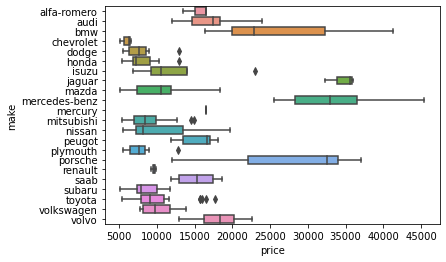

In [16]:
sns.boxplot(data=features,x=target,y="make")

In [17]:
features[(features.make=="dodge") & (target>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24


In [18]:
features.drop(29,axis=0,inplace=True)
target.drop(29,axis=0,inplace=True)

In [19]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [20]:
target

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 204, dtype: int64

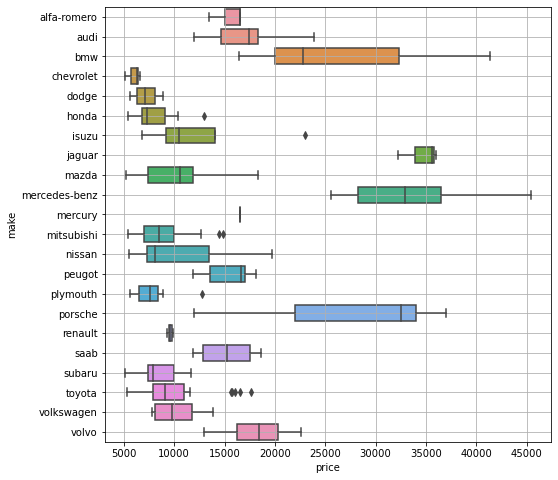

In [21]:
plt.figure(figsize=(8,8))
sns.boxplot(data=features,x=target,y="make")
plt.grid()

In [22]:
features[(features.make=="honda") & (target>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28


In [23]:
features.drop(41,axis=0,inplace=True)
target.drop(41,inplace=True)

In [24]:
features[(features.make=="isuzu") & (target>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43


In [25]:
features.drop(45,axis=0,inplace=True)
target.drop(45,inplace=True)

In [26]:
features[(features.make=="mitsubishi") & (target>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24


In [27]:
features.drop([83,84],axis=0,inplace=True)
target.drop([83,84],axis=0,inplace=True)

In [28]:
features[(features.make=="plymouth") & (target>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24


In [29]:
features.drop(124,axis=0,inplace=True)
target.drop(124,axis=0,inplace=True)

In [30]:
features[(features.make=="toyota") & (target>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24


In [31]:
features.drop([172,178,179,180,181],axis=0,inplace=True)
target.drop([172,178,179,180,181],axis=0,inplace=True)

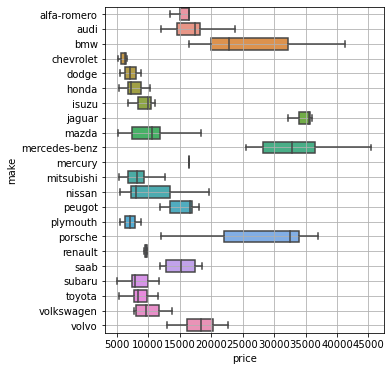

In [32]:
plt.figure(figsize=(5,6))
sns.boxplot(data=features,x=target,y="make")
plt.grid()

# Skewness Removal

In [33]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [34]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    object 
 3   fuel-type          194 non-null    object 
 4   body-style         194 non-null    object 
 5   drive-wheels       194 non-null    object 
 6   engine-location    194 non-null    object 
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    object 
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 22.7+ KB


In [35]:
features.select_dtypes(["int64","float64"])

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,64.1,48.8,130,111.0,21,27
1,3,122.0,64.1,48.8,130,111.0,21,27
2,1,122.0,65.5,52.4,152,154.0,19,26
3,2,164.0,66.2,54.3,109,102.0,24,30
4,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28
201,-1,95.0,68.8,55.5,141,160.0,19,25
202,-1,95.0,68.9,55.5,173,134.0,18,23
203,-1,95.0,68.9,55.5,145,106.0,26,27


In [36]:
colname=features.select_dtypes(["int64","float64"]).columns

In [37]:
colname

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [38]:
from scipy.stats import skew

In [39]:
skew(features["symboling"])

0.21386866184357742

In [40]:
features[colname]

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,64.1,48.8,130,111.0,21,27
1,3,122.0,64.1,48.8,130,111.0,21,27
2,1,122.0,65.5,52.4,152,154.0,19,26
3,2,164.0,66.2,54.3,109,102.0,24,30
4,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28
201,-1,95.0,68.8,55.5,141,160.0,19,25
202,-1,95.0,68.9,55.5,173,134.0,18,23
203,-1,95.0,68.9,55.5,145,106.0,26,27


symboling
0.21386866184357742


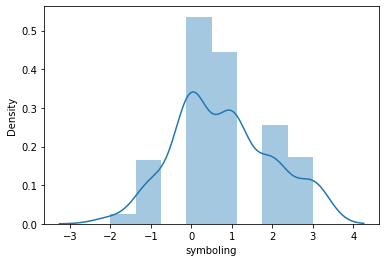

normalized-losses
0.848205953606264


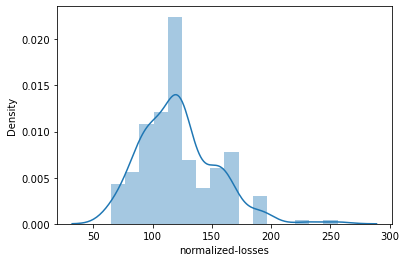

width
0.9140400320504322


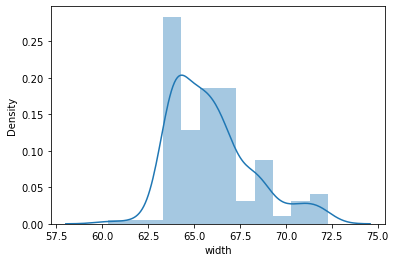

height
0.013839962443639326


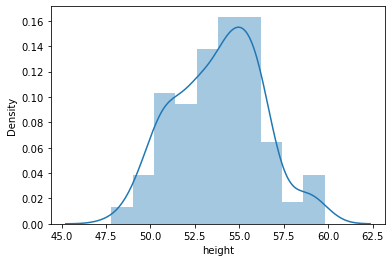

engine-size
2.0541257626466156


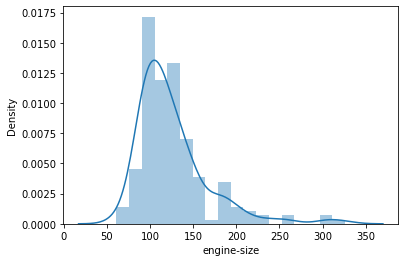

horsepower
1.5556576549504106


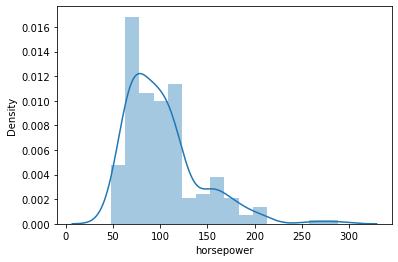

city-mpg
0.5999073033714895


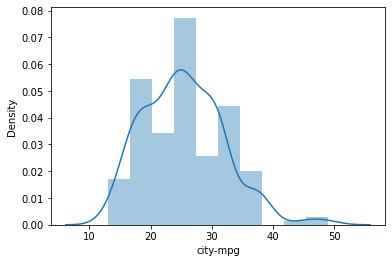

highway-mpg
0.4760310091695327


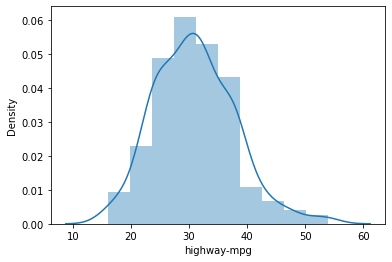

In [41]:
for col in features[colname]:
    print(col)
    print(skew(features[col]))
    
    plt.figure()
    sns.distplot(features[col])
    plt.show()

In [42]:
pd.concat([features,target],axis=1).corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973
width,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.090258,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.183385,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.212276,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168904,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.129973,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


In [43]:
pd.concat([features,target],axis=1).corr().style.background_gradient()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973
width,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.090258,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.183385,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.212276,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168904,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.129973,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


In [44]:
pd.concat([features,target],axis=1).corr()["price"].sort_values()

highway-mpg         -0.704846
city-mpg            -0.680412
symboling           -0.095905
normalized-losses    0.129973
height               0.147010
width                0.730503
horsepower           0.768921
engine-size          0.869638
price                1.000000
Name: price, dtype: float64

In [45]:
np.log(-1)

nan

In [46]:
np.sqrt(-1)

nan

In [47]:
n = 25
print(np.log(n))
print(np.sqrt(n))

3.2188758248682006
5.0


In [48]:
features["normalized-losses"]=np.log(features["normalized-losses"])

In [49]:
skew(features["normalized-losses"])

0.018468899462087518

<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

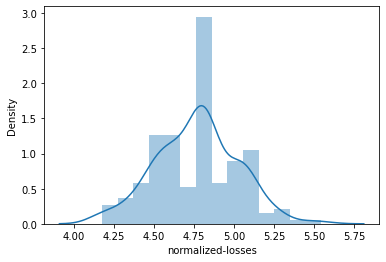

In [50]:
sns.distplot(features["normalized-losses"])

In [51]:
pd.concat([features,target],axis=1).corr().style.background_gradient()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.469376,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.469376,1.000000,0.075228,-0.379698,0.103697,0.195058,-0.215628,-0.168380,0.142736
width,-0.272388,0.075228,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.379698,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.103697,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.195058,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.215628,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168380,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.142736,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


symboling
0.21386866184357742


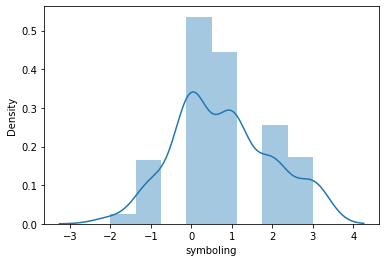

normalized-losses
0.018468899462087518


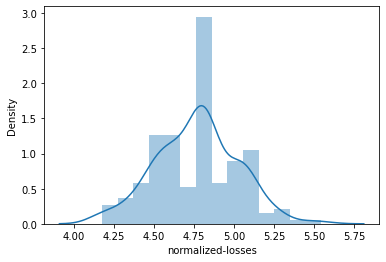

width
0.9140400320504322


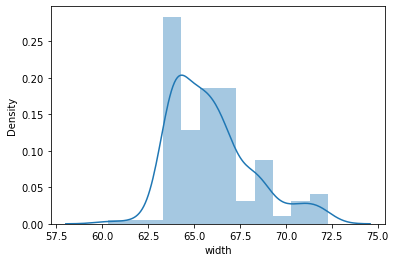

height
0.013839962443639326


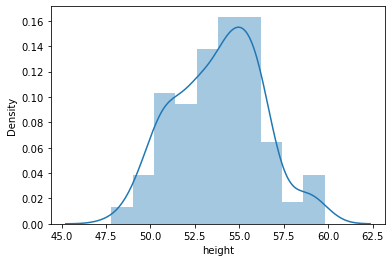

engine-size
2.0541257626466156


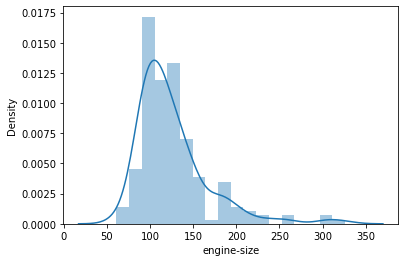

horsepower
1.5556576549504106


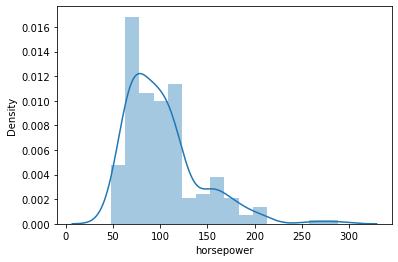

city-mpg
0.5999073033714895


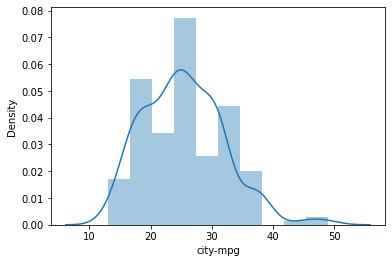

highway-mpg
0.4760310091695327


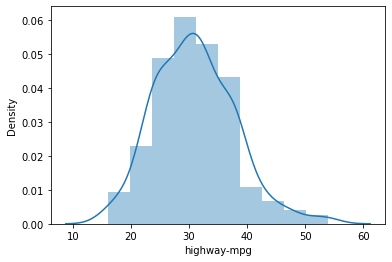

In [52]:
for col in features[colname]:
    print(col)
    print(skew(features[col]))
    
    plt.figure()
    sns.distplot(features[col])
    plt.show()

In [53]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,4.553877,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,4.553877,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


# HANDLING CATEGORICAL DATA

In [54]:
features["fuel-type"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 194, dtype: object

In [55]:
features["fuel-type"].value_counts()

gas       174
diesel     20
Name: fuel-type, dtype: int64

In [56]:
pd.get_dummies(features["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [57]:
pd.get_dummies(features["make"])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# OneHotEncoder

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
ohe = OneHotEncoder()

In [60]:
ohe.fit_transform(features[["make"]]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Label Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
#le.fit_transform(features["make","fuel-type"])

# Ordinal Encoding

In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [65]:
oe=OrdinalEncoder()

In [66]:
oe.fit_transform(features[["make","fuel-type","body-style"]])

array([[ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  2.],
       [ 1.,  1.,  3.],
       [ 1.,  1.,  3.],
       [ 1.,  1.,  3.],
       [ 1.,  1.,  3.],
       [ 1.,  1.,  4.],
       [ 1.,  1.,  3.],
       [ 1.,  1.,  2.],
       [ 2.,  1.,  3.],
       [ 2.,  1.,  3.],
       [ 2.,  1.,  3.],
       [ 2.,  1.,  3.],
       [ 2.,  1.,  3.],
       [ 2.,  1.,  3.],
       [ 2.,  1.,  3.],
       [ 2.,  1.,  3.],
       [ 3.,  1.,  2.],
       [ 3.,  1.,  2.],
       [ 3.,  1.,  3.],
       [ 4.,  1.,  2.],
       [ 4.,  1.,  2.],
       [ 4.,  1.,  2.],
       [ 4.,  1.,  2.],
       [ 4.,  1.,  3.],
       [ 4.,  1.,  3.],
       [ 4.,  1.,  3.],
       [ 4.,  1.,  4.],
       [ 5.,  1.,  2.],
       [ 5.,  1.,  2.],
       [ 5.,  1.,  2.],
       [ 5.,  1.,  2.],
       [ 5.,  1.,  2.],
       [ 5.,  1.,  3.],
       [ 5.,  1.,  4.],
       [ 5.,  1.,  2.],
       [ 5.,  1.,  2.],
       [ 5.,  1.,  3.],
       [ 5.,  1.,  3.],
       [ 5.,  1.,  3.],
       [ 6.,  1.

In [67]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,4.553877,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,4.553877,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [68]:
catcol = features.select_dtypes(object).columns

In [69]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
features[catcol]=oe.fit_transform(features[catcol])

In [70]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28
201,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25
202,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23
203,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27


In [71]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28
201,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25
202,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23
203,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27


# Scaling

In [72]:
n1 = 10#kg
n2 = 1000#gram

In [73]:
n1>n2

False

In [74]:
#xnew = (x-min)/(max-min)

In [75]:
a = np.array([1,2,3,4,5])

b = np.array([10,20,30,40,50])

c = np.array([100,200,300,400,500])

In [76]:
def minmax(arr):
    xnew = (arr - arr.min())/((arr.max() - arr.min()))
    return xnew

In [77]:
minmax(a)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [78]:
minmax(b)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [79]:
minmax(c)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
mn = MinMaxScaler()

In [82]:
#features.iloc[:,:] = mn.fit_transform(features.iloc[:,:])

In [83]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28
201,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25
202,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23
203,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27


In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
ss = StandardScaler()

In [86]:
features.iloc[:,:]=ss.fit_transform(features.iloc[:,:])

In [87]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.846173,0.146152,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.218578,-0.675762,-0.580474
1,1.846173,0.146152,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.218578,-0.675762,-0.580474
2,0.176441,0.146152,-1.934007,0.339032,-0.748984,1.234608,-0.125327,-0.179636,-0.582442,1.943631,0.628957,1.315353,-0.982065,-0.726156
3,1.011307,1.315366,-1.774620,0.339032,0.432341,-0.566249,-0.125327,0.140924,0.195695,-0.078162,-0.396602,-0.010980,-0.216307,-0.143429
4,1.011307,1.315366,-1.774620,0.339032,0.432341,-2.367105,-0.125327,0.232512,0.195695,-0.078162,0.247354,0.320603,-1.135217,-1.308883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.493292,-0.842445,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.366605,0.295097,-0.369459,-0.434792
201,-1.493292,-0.842445,1.413123,0.339032,0.432341,1.234608,-0.125327,1.331576,0.687151,-0.078162,0.366605,1.468391,-0.982065,-0.871838
202,-1.493292,-0.842445,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,1.943631,1.129812,0.805225,-1.135217,-1.163201
203,-1.493292,-0.842445,1.413123,-2.949576,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.462006,0.091046,0.089996,-0.580474


In [88]:
target

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 194, dtype: int64

# Split data into Train and Test

In [89]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size=0.30,random_state=1)

In [90]:
xtrain

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
104,1.846173,1.979288,-0.021361,0.339032,-0.748984,1.234608,-0.125327,0.919427,-1.688216,1.943631,1.320613,1.468391,-0.982065,-0.871838
200,-1.493292,-0.842445,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.366605,0.295097,-0.369459,-0.434792
18,1.011307,0.113624,-1.455845,0.339032,-0.748984,-0.566249,-0.125327,-2.560941,-0.254805,-1.089059,-1.541412,-1.388325,3.306180,3.207251
165,0.176441,1.410602,1.094349,0.339032,0.432341,1.234608,-0.125327,-0.866551,-0.500533,-3.110852,-0.658954,0.244084,0.089996,-0.289111
118,0.176441,0.047754,0.297413,0.339032,-0.748984,-0.566249,-0.125327,-0.958140,-1.237716,-0.078162,-0.849756,-0.878197,1.774664,1.459070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.011307,-1.376124,0.934962,0.339032,-0.748984,-0.566249,-0.125327,-1.049729,-0.050032,0.932735,-0.420452,-0.750665,0.089996,0.002253
143,-0.658425,-0.561466,0.934962,0.339032,0.432341,-0.566249,-0.125327,-0.225431,-0.541487,0.932735,-0.420452,-0.215031,0.089996,0.147935
75,0.176441,0.146152,-0.340135,0.339032,-0.748984,1.234608,-0.125327,0.965221,0.400468,-0.078162,0.342755,1.850987,-0.982065,-1.017519
146,-0.658425,-1.100283,0.934962,0.339032,1.613665,-0.566249,-0.125327,-0.225431,-0.336714,0.932735,-0.420452,-0.521108,0.396300,0.147935


In [91]:
ytrain

104    17199
200    16845
18      5151
165     9298
118     5572
       ...  
139     7053
143     9960
75     16503
146     7463
38      9095
Name: price, Length: 135, dtype: int64

In [92]:
xtest

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
47,-0.658425,0.828732,-0.818297,0.339032,0.432341,1.234608,-0.125327,1.697931,-0.418624,-3.110852,3.157080,1.876493,-1.594671,-1.745928
183,1.011307,0.146152,1.253736,0.339032,0.432341,-0.566249,-0.125327,-0.179636,0.769060,-0.078162,-0.396602,-0.444589,0.243148,0.439298
169,1.011307,0.516934,1.094349,0.339032,-0.748984,1.234608,-0.125327,-0.133842,-0.746260,-0.078162,0.485856,0.346110,-0.216307,-0.143429
36,-0.658425,-1.621675,-1.137071,0.339032,1.613665,-0.566249,-0.125327,-0.912346,1.833880,-0.078162,-0.802056,-0.674146,0.702603,0.439298
142,-0.658425,-0.561466,0.934962,0.339032,0.432341,-0.566249,-0.125327,-0.225431,-0.541487,0.932735,-0.420452,-0.521108,0.396300,0.293616
11,-0.658425,1.938333,-1.615232,0.339032,0.432341,1.234608,-0.125327,-0.500197,0.195695,-0.078162,-0.420452,-0.036486,-0.369459,-0.289111
129,0.176441,0.146152,0.456800,0.339032,-0.748984,1.234608,-0.125327,2.934377,-1.360580,-2.099955,1.845318,4.733209,-1.288368,-0.434792
87,0.176441,0.242160,-0.180748,0.339032,0.432341,-0.566249,-0.125327,-0.225431,-0.910079,-0.078162,-0.372752,0.346110,-0.369459,-0.143429
186,1.011307,-0.884267,1.253736,0.339032,0.432341,-0.566249,-0.125327,-0.179636,0.769060,-0.078162,-0.396602,-0.444589,0.243148,0.439298
107,-0.658425,1.242402,0.138026,0.339032,0.432341,1.234608,-0.125327,1.148399,1.178606,-1.089059,-0.134250,-0.138512,-0.982065,-1.017519


In [93]:
ytest

47     32250
183     7975
169     9989
36      7295
142     7775
11     16925
129    12000
87      9279
186     8495
107    11900
185     8195
191    13295
30      6479
16     41315
149    11694
173     8948
28      8921
54      7395
32      5399
128    37028
50      5195
4      17450
103    13499
59      8845
81      8499
61     10595
138     5118
130     9295
56     11845
133    12170
70     31600
126    32528
62     10245
102    14399
198    18420
14     24565
42     10345
19      6295
115    16630
117    18150
119     7957
174    10698
72     35056
158     7898
34      7129
94      7299
160     7738
199    18950
110    13860
112    16900
44     10000
17     36880
5      15250
122     7609
193    12290
51      6095
40     10295
121     6692
69     28176
Name: price, dtype: int64